# Original

## 1 player setting

In [1]:
import random

GOAL = 12
action_A = {'reward':6, 'prob':1/6, 'match':[1]}
action_B = {'reward':3, 'prob':1/3, 'match':[2,3]}
action_C = {'reward':2, 'prob':1/2, 'match':[4,5,6]}
actions = [action_A,action_B,action_C]

In [2]:
def selection_strategy_1(**kwargs):
    return action_A

def selection_strategy_2(**kwargs):
    return action_B

def selection_strategy_3(**kwargs):
    return action_C

def selection_strategy_4(**kwargs):
    ix = random.randint(0,2)
    return actions[ix]
    
def selection_strategy_5(**kwargs):
    global counter
    counter +=1
    if counter%2 == 0:
        return action_A
    else:
        return action_B
    
def selection_strategy_6(**kwargs):
    global counter
    counter +=1
    if counter%2 == 0:
        return action_A
    else:
        return action_C

def selection_strategy_7(**kwargs):
    global counter
    counter +=1
    if counter%2 == 0:
        return action_B
    else:
        return action_C
    
def selection_strategy_8(**kwargs):
    threshold = 0.4
    rand = random.randint(1,10)
    if rand > threshold:
        return action_B
    else:
        return action_C
    
def selection_strategy_9(**kwargs):
    if kwargs['prev_action']==action_A:
        return action_B
    elif kwargs['prev_action']==action_B:
        return action_C
    elif kwargs['prev_action']==action_C:
        return action_A

def selection_strategy_10(**kwargs):
    ''' Up the stakes if success in previous round, down the stakes otherwise'''
    prev_action = kwargs['prev_action']
    prev_dice_res = kwargs['prev_dice_res']
    if prev_action == action_C:
        if prev_dice_res in prev_action['match']:
            return action_C
        else:
            return action_B
    elif prev_action == action_B:
        if prev_dice_res in prev_action['match']:
            return action_C
        else:
            return action_A
    elif prev_action == action_A:
        if prev_dice_res in prev_action['match']:
            return action_B
        else:
            return action_A
        


In [3]:
def play_dice_game(selection_strategy,iteration_no):
    #play dice game, 1 player
    dice_throws_arr = []

    for i in range(0,iteration_no):
        
        #vars
        profit = 0
        rounds = 0
        prev_action = actions[random.randint(0,2)]  #choose a random action to begin
        prev_dice_res = random.randint(1,6)

        while profit < GOAL:
            
            #sel action, roll dice, count reward
            kwargs = {'profit':profit,'rounds':rounds, 'prev_action':prev_action,\
                     'prev_dice_res':prev_dice_res}
            sel_action = selection_strategy(**kwargs)
            dice_res = random.randint(1,6)
            if dice_res in sel_action['match']:
                profit += sel_action['reward']
            
            #update state
            rounds += 1
            prev_action = sel_action
            prev_dice_res = dice_res

        dice_throws_arr.append(rounds)
    
    return np.mean(dice_throws_arr)

In [4]:
no_rounds = 5

In [5]:
play_dice_game(selection_strategy_1,no_rounds)

NameError: name 'np' is not defined

In [ ]:
play_dice_game(selection_strategy_2,no_rounds)

In [ ]:
play_dice_game(selection_strategy_3,no_rounds)

In [ ]:
play_dice_game(selection_strategy_4,no_rounds)

In [ ]:
play_dice_game(selection_strategy_5,no_rounds)

In [ ]:
play_dice_game(selection_strategy_6,no_rounds)

In [ ]:
play_dice_game(selection_strategy_7,no_rounds)

In [ ]:
play_dice_game(selection_strategy_8,no_rounds)

In [ ]:
play_dice_game(selection_strategy_9,no_rounds)

In [ ]:
play_dice_game(selection_strategy_10,no_rounds)

## Graphs

In [ ]:
#run simulations
#iteration_no_arr = [10,100,200,300,400,500,600,700,800,900,1000]
iteration_no_arr = np.arange(1,500)
result_arr = []
strategy_arr = [selection_strategy_1,selection_strategy_2,\
               selection_strategy_3,selection_strategy_4,\
               selection_strategy_5]

for strategy in strategy_arr :
    results = []

    for i in iteration_no_arr:
        results.append(play_dice_game(strategy,i))
    
    result_arr.append(results)

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=((15,7)))
plt.plot(iteration_no_arr,result_arr[0])
plt.plot(iteration_no_arr,result_arr[1])
plt.plot(iteration_no_arr,result_arr[2])
plt.plot(iteration_no_arr,result_arr[3])
plt.plot(iteration_no_arr,result_arr[4])
plt.title('Avg number of throws to win\n Per strategy')
plt.xlabel('Iterations')
plt.ylabel('Avg number of throws')
plt.legend(['action_A','action_B','action_C','random','flip'])
plt.show()

In [ ]:
#run simulations
iteration_no_arr = [10,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
#iteration_no_arr = np.arange(1,500)
result_arr = []
strategy_arr = [selection_strategy_1,selection_strategy_2,\
               selection_strategy_3,selection_strategy_4,\
               selection_strategy_5]

for strategy in strategy_arr :
    results = []

    for i in iteration_no_arr:
        results.append(play_dice_game(strategy,i))
    
    result_arr.append(results)

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=((15,7)))
plt.plot(iteration_no_arr,result_arr[0])
plt.plot(iteration_no_arr,result_arr[1])
plt.plot(iteration_no_arr,result_arr[2])
plt.plot(iteration_no_arr,result_arr[3])
plt.plot(iteration_no_arr,result_arr[4])
plt.title('Avg number of throws to win\n Per strategy')
plt.xlabel('Iterations')
plt.ylabel('Avg number of throws')
plt.legend(['action_A','action_B','action_C','random','flip'])
plt.show()

## 2 player setting

In [ ]:
import random

GOAL = 12
action_A = {'reward':6, 'prob':1/6, 'match':[6]}
action_B = {'reward':3, 'prob':1/3, 'match':[2,3]}
action_C = {'reward':2, 'prob':1/2, 'match':[4,5,6]}
actions = [action_A,action_B,action_C]

In [ ]:
counter=0

def selection_strategy_1(**kwargs):
    return action_A

def selection_strategy_2(**kwargs):
    return action_B

def selection_strategy_3(**kwargs):
    return action_C

def selection_strategy_4(**kwargs):
    ix = random.randint(0,2)
    return actions[ix]
    
def selection_strategy_5(**kwargs):
    global counter
    counter +=1
    if counter%2 == 0:
        return action_A
    else:
        return action_B
    
def selection_strategy_6(**kwargs):
    return kwargs['sel_action_p1']

In [ ]:
def play_dice_game_2p(selection_strategy_p1,selection_strategy_p2,iteration_no):
    winner_array = []

    for i in range(0,iteration_no):
        profit_p1 = 0
        profit_p2 = 0
        rounds = 0
        prev_action_p1 = actions[random.randint(0,2)]  #choose a random action to begin
        prev_action_p2 = actions[random.randint(0,2)]  #choose a random action to begin
        prev_dice_res = random.randint(1,6)

        while profit_p1 < GOAL and profit_p2 < GOAL:
            #select strategy
            args_p1 = {'profit_p1':profit_p1,'profit_p2':profit_p2,\
                      'rounds':rounds, 'prev_action_p1':prev_action_p1,\
                      'prev_action_p2':prev_action_p2,\
                      'prev_dice_res':prev_dice_res}
            sel_action_p1 = selection_strategy_p1(**args_p1)
            args_p2 = {'profit_p1':profit_p1,'profit_p2':profit_p2,\
                      'rounds':rounds, 'prev_action_p1':prev_action_p1,\
                      'prev_action_p2':prev_action_p2,\
                      'prev_dice_res':prev_dice_res,\
                      'sel_action_p1':sel_action_p1}
            sel_action_p2 = selection_strategy_p2(**args_p2)
            
            #check reward
            dice_res = random.randint(1,6)
            if dice_res in sel_action_p1['match']:
                profit_p1 += sel_action_p1['reward']
            if dice_res in sel_action_p2['match']:
                profit_p2 += sel_action_p2['reward']

            #update
            rounds += 1
            prev_action_1 = sel_action_p1
            prev_action_2 = sel_action_p2
            prev_dice_res = dice_res
        
        if profit_p1==profit_p2:
            winner_array.append(0)
        elif profit_p1>profit_p2:
            winner_array.append(1)
        elif profit_p1<profit_p2:
            winner_array.append(2)
            
    #decide winner
    winner_array = np.array(winner_array)
    return winner_array

In [ ]:
def chooseWinner(winner_arr):
    
    p2 = len(np.where(arr==2)[0])
    p1 = len(np.where(arr==1)[0])
    
    if p1==p2:
        print('Draw between player 1 and 2')

    elif p1>p2:
        print('Player 1 wins ' + str(p1) + ' vs. ' + str(p2))

    elif p2>p1:
        print('Player 2 wins ' + str(p2) + ' vs. ' + str(p1))


In [ ]:
no_rounds = 1000
arr = play_dice_game_2p(selection_strategy_1,selection_strategy_2,no_rounds)
chooseWinner(arr)

In [ ]:
no_rounds = 1000
arr = play_dice_game_2p(selection_strategy_1,selection_strategy_3,no_rounds)
chooseWinner(arr)

In [ ]:
no_rounds = 1000
arr = play_dice_game_2p(selection_strategy_1,selection_strategy_4,no_rounds)
chooseWinner(arr)

In [ ]:
no_rounds = 1000
arr = play_dice_game_2p(selection_strategy_1,selection_strategy_5,no_rounds)
chooseWinner(arr)

In [ ]:
no_rounds = 1000
arr = play_dice_game_2p(selection_strategy_3,selection_strategy_2,no_rounds)
chooseWinner(arr)

In [6]:
no_rounds = 1000
arr = play_dice_game_2p(selection_strategy_3,selection_strategy_6,no_rounds)
chooseWinner(arr)

NameError: name 'play_dice_game_2p' is not defined

In [ ]:
no_rounds = 1000
arr = play_dice_game_2p(selection_strategy_3,selection_strategy_6,no_rounds)
chooseWinner(arr)

## CMy verion

In [ ]:
import random

No_iter = 0
GOAL = 12
action_A = {'reward':7, 'prob':1/6, 'match':[6]}
action_B = {'reward':5, 'prob':1/3, 'match':[2,3]}
action_C = {'reward':4, 'prob':1/2, 'match':[4,5,6]}
actions = [action_A,action_B,action_C]

In [ ]:
def play_dice_game(selection_strategy,iteration_no):
    dice_throws_arr = []

    for i in range(0,iteration_no):
        profit = 0
        dice_throws = 0

        while profit < GOAL:
            sel_action = selection_strategy()
            dice_res = random.randint(1,6)
            if dice_res in sel_action['match']:
                profit += sel_action['reward']
            dice_throws += 1
        
        dice_throws_arr.append(dice_throws)
    
    return np.mean(dice_throws_arr)

In [ ]:
counter=0

def selection_strategy_1():
    return action_A

def selection_strategy_2():
    return action_B

def selection_strategy_3():
    return action_C

def selection_strategy_4():
    ix = random.randint(0,2)
    return actions[ix]

def selection_strategy_4():
    ix = random.randint(0,2)
    return actions[ix]
    
def selection_strategy_5():
    global counter
    counter +=1
    if counter%2 == 0:
        return action_A
    else:
        return action_B

In [ ]:
def play_dice_game(selection_strategy,iteration_no):
    dice_throws_arr = []

    for i in range(0,iteration_no):
        profit = 0
        dice_throws = 0

        while profit < GOAL:
            sel_action = selection_strategy()
            dice_res = random.randint(1,6)
            if dice_res in sel_action['match']:
                profit += sel_action['reward']
            dice_throws += 1
        
        dice_throws_arr.append(dice_throws)
    
    return np.mean(dice_throws_arr)

In [ ]:
#run simulations
#iteration_no_arr = [10,100,200,300,400,500,600,700,800,900,1000]
iteration_no_arr = np.arange(1,30)
result_arr = []
strategy_arr = [selection_strategy_1,selection_strategy_2,\
               selection_strategy_3,selection_strategy_4,\
               selection_strategy_5]

for strategy in strategy_arr :
    results = []

    for i in iteration_no_arr:
        results.append(play_dice_game(strategy,i))
    
    result_arr.append(results)

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=((15,7)))
plt.plot(iteration_no_arr,result_arr[0])
plt.plot(iteration_no_arr,result_arr[1])
plt.plot(iteration_no_arr,result_arr[2])
plt.plot(iteration_no_arr,result_arr[3])
plt.plot(iteration_no_arr,result_arr[4])
plt.title('Avg number of throws to win\n Per strategy')
plt.xlabel('Iterations')
plt.ylabel('Avg number of throws')
plt.legend(['action_A','action_B','action_C','random','flip'])
plt.show()

# Probs

In [55]:
import random

GOAL = 12
action_A = {'reward':6, 'prob':1/6, 'match':[1]}
action_B = {'reward':3, 'prob':1/3, 'match':[2,3]}
action_C = {'reward':2, 'prob':1/2, 'match':[4,5,6]}
actions = [action_A,action_B,action_C]

In [56]:
#Action A
from math import comb

r = 2
p = 1/6
q = 1 - p
a_prob_array = list(np.zeros(r-1))

for n in range(r,20):
    r = 2
    prob = 0
    while n>=r:
        #print(r)
        prob_exactr = comb(n,r) * pow(p,r) * pow(q,n-r)
        prob += prob_exactr
        r+=1
    a_prob_array.append(prob)

In [57]:
#Action B
from math import comb

r = 4
p = 1/3
q = 1 - p
b_prob_array = list(np.zeros(r-1))

for n in range(r,20):
    r = 4
    prob = 0
    while n>=r:
        #print(r)
        prob_exactr = comb(n,r) * pow(p,r) * pow(q,n-r)
        prob += prob_exactr
        r+=1
    b_prob_array.append(prob)


In [58]:
#Action C
from math import comb

r = 6
p = 1/2
q = 1 - p
c_prob_array = list(np.zeros(r-1))

for n in range(r,20):
    r = 6
    prob = 0
    while n>=r:
        #print(r)
        prob_exactr = comb(n,r) * pow(p,r) * pow(q,n-r)
        prob += prob_exactr
        r+=1
    c_prob_array.append(prob)


In [59]:
len(a_prob_array)

19

In [60]:
import pandas as pd

prob_dict = {'Action A':a_prob_array,'Action B':b_prob_array,'Action C':c_prob_array}
df = pd.DataFrame(prob_dict)
df.index = list(map(lambda x:x+1, df.index.astype(int).values))
df.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Action A,0.0,0.027778,0.074074,0.131944,0.196245,0.263224,0.330204,0.395323,0.457341,0.515483,0.569318,0.618667,0.663530,0.704031,0.740378,0.772831,0.801678,0.827219,0.849756
Action B,0.0,0.000000,0.000000,0.012346,0.045267,0.100137,0.173297,0.258650,0.349693,0.440736,0.527443,0.606925,0.677576,0.738807,0.790760,0.834054,0.869578,0.898335,0.921341
Action C,0.0,0.000000,0.000000,0.000000,0.000000,0.015625,0.062500,0.144531,0.253906,0.376953,0.500000,0.612793,0.709473,0.788025,0.849121,0.894943,0.928268,0.951874,0.968216


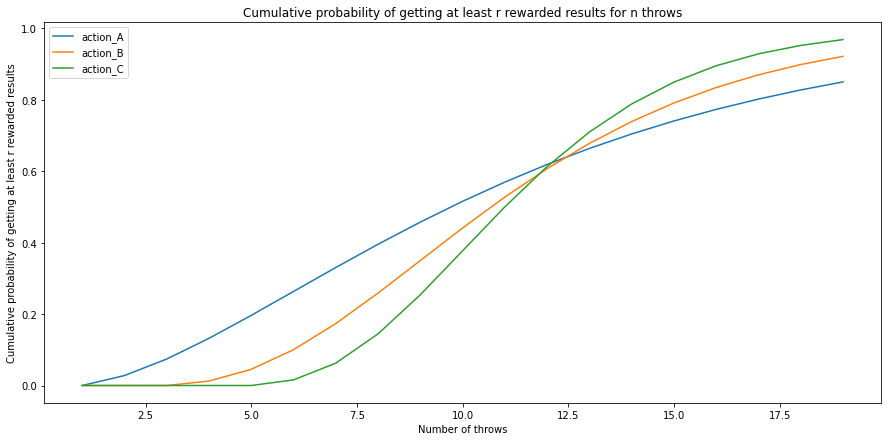

In [61]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=((15,7)))
plt.plot(np.arange(1,20),a_prob_array)
plt.plot(np.arange(1,20),b_prob_array)
plt.plot(np.arange(1,20),c_prob_array)
plt.title('Cumulative probability of getting at least r rewarded results for n throws')
plt.xlabel('Number of throws')
plt.ylabel('Cumulative probability of getting at least r rewarded results')
plt.legend(['action_A','action_B','action_C','random','flip'])
plt.show()

In [62]:
p = 1/6
q = 1-p

comb(10,2)*pow(p,r)*pow(q,n-r)

1.4769600630072753e-14

In [63]:
v

NameError: name 'v' is not defined

# Probs

In [64]:
#Action A
from math import comb

r = 1
p = 1/6
q = 1 - p
a_prob_array = list(np.zeros(r-1))

for n in range(r,20):
    r = 1
    prob = 0
    while n>=r:
        #print(r)
        prob_exactr = comb(n,r) * pow(p,r) * pow(q,n-r)
        prob += prob_exactr
        r+=1
    a_prob_array.append(prob)

In [65]:
#Action B
from math import comb

r = 2
p = 1/3
q = 1 - p
b_prob_array = list(np.zeros(r-1))

for n in range(r,20):
    r = 2
    prob = 0
    while n>=r:
        #print(r)
        prob_exactr = comb(n,r) * pow(p,r) * pow(q,n-r)
        prob += prob_exactr
        r+=1
    b_prob_array.append(prob)


In [66]:
#Action C
from math import comb

r = 3
p = 1/2
q = 1 - p
c_prob_array = list(np.zeros(r-1))

for n in range(r,20):
    r = 3
    prob = 0
    while n>=r:
        #print(r)
        prob_exactr = comb(n,r) * pow(p,r) * pow(q,n-r)
        prob += prob_exactr
        r+=1
    c_prob_array.append(prob)


In [67]:
len(a_prob_array)

19

In [68]:
import pandas as pd

prob_dict = {'Action A':a_prob_array,'Action B':b_prob_array,'Action C':c_prob_array}
df = pd.DataFrame(prob_dict)
df.index = list(map(lambda x:x+1, df.index.astype(int).values))
df.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Action A,0.166667,0.305556,0.421296,0.517747,0.598122,0.665102,0.720918,0.767432,0.806193,0.838494,0.865412,0.887843,0.906536,0.922113,0.935095,0.945912,0.954927,0.962439,0.968699
Action B,0.000000,0.111111,0.259259,0.407407,0.539095,0.648834,0.736626,0.804908,0.856932,0.895951,0.924853,0.946049,0.961463,0.972596,0.980589,0.986298,0.990358,0.993234,0.995264
Action C,0.000000,0.000000,0.125000,0.312500,0.500000,0.656250,0.773438,0.855469,0.910156,0.945312,0.967285,0.980713,0.988770,0.993530,0.996307,0.997910,0.998825,0.999344,0.999636


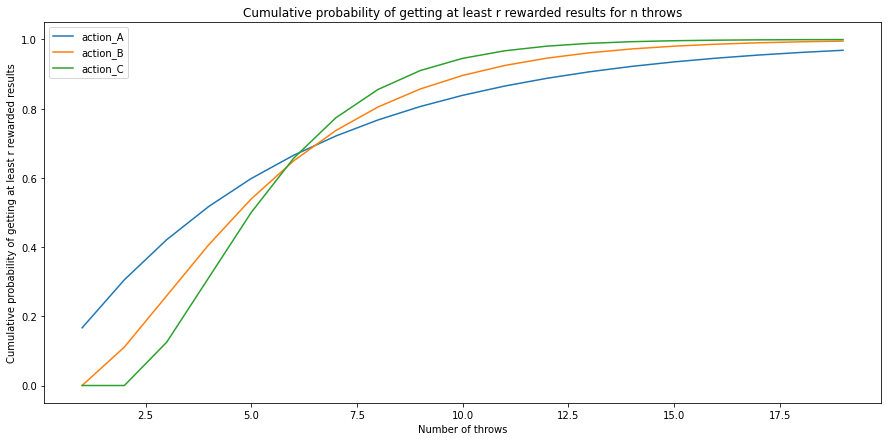

In [69]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=((15,7)))
plt.plot(np.arange(1,20),a_prob_array)
plt.plot(np.arange(1,20),b_prob_array)
plt.plot(np.arange(1,20),c_prob_array)
plt.title('Cumulative probability of getting at least r rewarded results for n throws')
plt.xlabel('Number of throws')
plt.ylabel('Cumulative probability of getting at least r rewarded results')
plt.legend(['action_A','action_B','action_C','random','flip'])
plt.show()

In [70]:
p = 1/6
q = 1-p

comb(10,2)*pow(p,r)*pow(q,n-r)

1.4769600630072753e-14

In [ ]:
1/6*

# Reinforcement learning

In [51]:
import gym

In [247]:
import gym
from gym import spaces
import random

#global vars
GOAL = 13
ACTION_A = {'reward':6, 'prob':1/6, 'match':[1]}
ACTION_B = {'reward':3, 'prob':1/3, 'match':[2,3]}
ACTION_C = {'reward':2, 'prob':1/2, 'match':[4,5,6]}
ACTIONS = [ACTION_A,ACTION_B,ACTION_C]
MAX_REWARD = 6
    
class DiceGameEnv(gym.Env):
    """Custom Environment that follows gym interface"""
    metadata = {'render.modes': ['human']}
    profit = 0
    rounds = 0
    prev_dice_res = 0

    def __init__(self):
        super(DiceGameEnv, self).__init__()    # Define action and observation space
        # They must be gym.spaces objects    # Example when using discrete actions:
        self.profit = 0
        self.rounds = 0
        self.prev_dice_res = 0
        self.action_space = spaces.Discrete(len(ACTIONS))    # Example for using image as input:
        self.observation_space = spaces.Discrete(GOAL)

    def step(self, action):
        # Execute one time step within the environment
        #roll dice
        self.prev_dice_res = random.randint(1,6)
        self.rounds += 1
        
        #add profit
        if self.prev_dice_res in action['match'] and self.profit<GOAL:
            self.profit += action['reward']
    
        #determine reward
        if self.profit == 12:
            reward = 1
        else:
            reward = 0
        
        # find out if finished
        done = bool(self.profit == 12)
        
        # Optionally we can pass additional info, we are not using that for now
        info = {}
        
        return np.array([self.profit]).astype(np.float32), reward, done, info
    
    def reset(self):
        # Reset the state of the environment to an initial state
        self.profit = 0
        self.rounds = 0
        self.prev_dice_res = 0
        
        return np.array([self.profit]).astype(np.float32)
        

    def render(self, mode='human', close=False):
        # Render the environment to the screen
        print("dice: %d" %self.prev_dice_res, end=" | ")
        print("profit: %d" %self.profit)
 
    def close(self):
        pass


In [248]:
env = DiceGameEnv()
obs = env.reset()
env.render()

print(env.observation_space)
print(env.action_space)
print(env.action_space.sample())

dice: 0 | profit: 0
Discrete(13)
Discrete(3)
0


In [249]:
n_steps = 50
for step in range(n_steps):
    print("Step {}".format(step + 1))
    obs, reward, done, info = env.step(ACTION_A)
    print('obs=', obs, 'reward=', reward, 'done=', done)
    env.render()
    if done:
        print("Goal reached!", "reward=", reward)
        break

Step 1
obs= [0.] reward= 0 done= False
dice: 5 | profit: 0
Step 2
obs= [0.] reward= 0 done= False
dice: 4 | profit: 0
Step 3
obs= [0.] reward= 0 done= False
dice: 4 | profit: 0
Step 4
obs= [0.] reward= 0 done= False
dice: 3 | profit: 0
Step 5
obs= [0.] reward= 0 done= False
dice: 2 | profit: 0
Step 6
obs= [0.] reward= 0 done= False
dice: 4 | profit: 0
Step 7
obs= [0.] reward= 0 done= False
dice: 6 | profit: 0
Step 8
obs= [0.] reward= 0 done= False
dice: 3 | profit: 0
Step 9
obs= [6.] reward= 0 done= False
dice: 1 | profit: 6
Step 10
obs= [6.] reward= 0 done= False
dice: 3 | profit: 6
Step 11
obs= [6.] reward= 0 done= False
dice: 3 | profit: 6
Step 12
obs= [6.] reward= 0 done= False
dice: 3 | profit: 6
Step 13
obs= [6.] reward= 0 done= False
dice: 4 | profit: 6
Step 14
obs= [6.] reward= 0 done= False
dice: 3 | profit: 6
Step 15
obs= [6.] reward= 0 done= False
dice: 2 | profit: 6
Step 16
obs= [6.] reward= 0 done= False
dice: 6 | profit: 6
Step 17
obs= [12.] reward= 1 done= True
dice: 1 |

In [259]:
import numpy as np

q_table = np.zeros([GOAL,len(ACTIONS)])
q_table

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [260]:
pd.DataFrame(q_table, columns={'ACTION_A','ACTION_B','ACTION_C'})

,ACTION_B,ACTION_A,ACTION_C
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [251]:

"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.2

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 10000):
    state = env.reset()
    state = int(state[0])

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action_ix = random.randint(0,2)
        else:
            action_ix = np.argmax(q_table[state]) # Exploit learned values
        #print(action_ix)

        next_state, reward, done, info = env.step(ACTIONS[action_ix]) 
        next_state = int(next_state[0])
        
        if next_state>=GOAL:
            break
        
        old_value = q_table[state, action]            
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action_ix] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 9900
Training finished.



In [252]:
action_ix

0

In [253]:
random.randint(0,2)

2

In [254]:
q_table

array([[1.92633112e-02, 1.96381156e-02, 1.75207001e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.68967570e-04, 5.52957094e-04, 2.90918928e-03],
       [9.65452226e-03, 2.52929951e-02, 9.01236388e-03],
       [2.26699073e-02, 2.29528469e-02, 3.53767835e-02],
       [5.83906443e-05, 5.62885811e-05, 1.28299493e-04],
       [2.44834908e-01, 2.26739405e-01, 2.20856991e-01],
       [7.16386266e-04, 6.87802466e-04, 7.02975902e-03],
       [1.50069449e-03, 1.35062504e-03, 1.85619940e-03],
       [7.18496837e-03, 1.06466472e-01, 6.46647154e-03],
       [1.99187831e-02, 1.51588225e-02, 1.17926905e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [258]:
pd.DataFrame(q_table, columns={'ACTION_A','ACTION_B','ACTION_C'})

,ACTION_B,ACTION_A,ACTION_C
0,0.019263,0.019638,0.017521
1,0.000000,0.000000,0.000000
2,0.000569,0.000553,0.002909
3,0.009655,0.025293,0.009012
4,0.022670,0.022953,0.035377
5,0.000058,0.000056,0.000128
6,0.244835,0.226739,0.220857
7,0.000716,0.000688,0.007030
8,0.001501,0.001351,0.001856
9,0.007185,0.106466,0.006466


In [256]:
for i in q_table:
    print(i,end='|')
    print(np.argmax(i))

[0.01926331 0.01963812 0.0175207 ]|1
[0. 0. 0.]|0
[0.00056897 0.00055296 0.00290919]|2
[0.00965452 0.025293   0.00901236]|1
[0.02266991 0.02295285 0.03537678]|2
[5.83906443e-05 5.62885811e-05 1.28299493e-04]|2
[0.24483491 0.22673941 0.22085699]|0
[0.00071639 0.0006878  0.00702976]|2
[0.00150069 0.00135063 0.0018562 ]|2
[0.00718497 0.10646647 0.00646647]|1
[0.01991878 0.01515882 0.1179269 ]|2
[0. 0. 0.]|0
[0. 0. 0.]|0


In [ ]:
ss1p()